https://www.youtube.com/watch?v=YFUqN380eoo

In [17]:
var("x y")

(x, y)

In [2]:
f = x + sqrt(1+x^2)

In [35]:
g = (y^2 - 1)/(2*y)

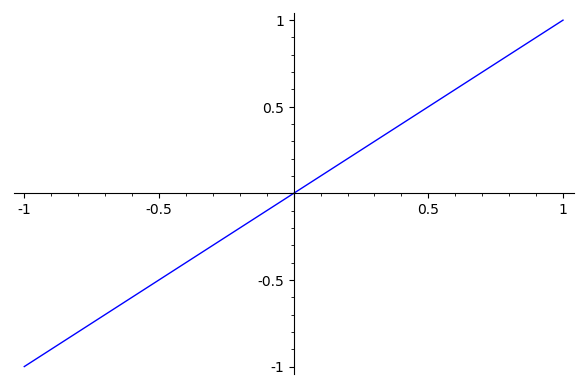

In [36]:
plot(g(f))

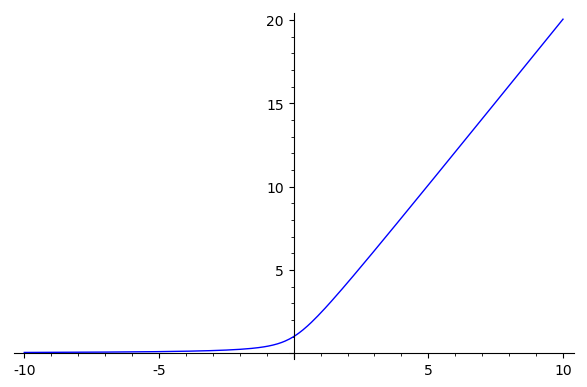

In [32]:
plot(f,x,-10,10)

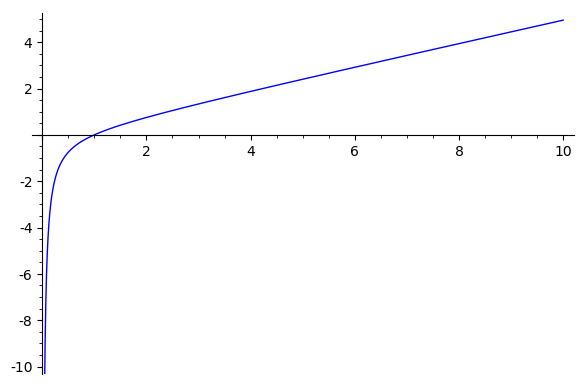

In [37]:
plot(g,y,0,10,ymin=-10)

f is like an exponential function $\mathbb{R} \to \mathbb{R}_{>0}$, g is like its logarithm.

To be more precise

$$ g(ab^{-1}) = \frac{a^2b^{-2} - a^2 + a^2 -1}{2ab^{-1}} = ag(b^{-1}) + bg(a) $$

In [46]:
expand(g(x) + g(1/x))

0

In [47]:
g == 1/2 * (x - 1/x)

1/2*(y^2 - 1)/y == 1/2*x - 1/2/x

In [62]:
expand(f(x)*f(-x))

1

Plugging in $a=f(x), b=f(y)$:

$$0 = g(1) = g(f(x)f(y)) = f(y)x + f(x)^{-1}y$$
multiply by $f(x)$ and use assumption $f(x)f(y) = 1$:
$$ 0 = f(x)f(y) x + y = x+y $$

# approximating the logarithm?

In [85]:
Log = lambda n: (x^n - x^(-n))/(2*n)

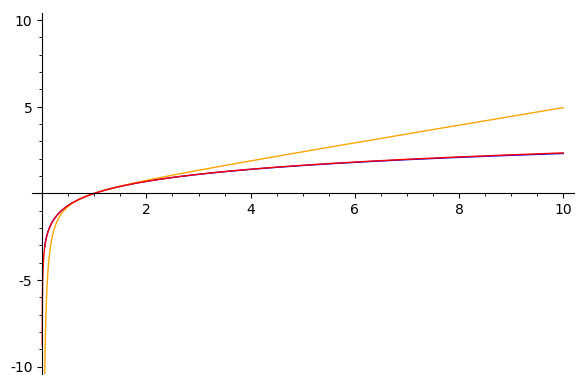

In [86]:
plot(log(x),      (x,0,10),ymin=-10,ymax=10,color="blue") \
    + plot(Log(1),(x,0,10),ymin=-10,ymax=10,color="orange") \
    + plot(Log(1/8),(x,0,10),ymin=-10,ymax=10,color="red") \

### An Approximate Logarithm

$$ \text{Define } L_t(x) := \frac{x^t - x^{-t}}{2t} \text{ for } t > 0 \text{.}$$

- $$ L_t(1) = 0 $$
- $$ L_t(x) + L_t(1/x) = 0 $$
- $$ L_t(e^x) = \frac 1t \sinh(tx) $$
- $$ L_t(a^b) = b L_{bt}(a) $$
- $$ L_t(ab) = b^{-t} L_t(a) + a^{t} L_t(b) $$
- $$\lim_{t\to 0} L_t(x) = \log(x) \text{ for all } x > 0 $$

In [108]:
t = 0.0001
float(log(factorial(10))), \
    float(Log(t)(factorial(10))), \
    float(sum([(factorial(10)/factorial(n)/factorial(n-1))^t*Log(t)(n) for n in range(1,11)]))

(15.104412573075516, 15.104418316360352, 15.104418316359816)

- $$ L_t(aa) = (a^{-t} + a^t)L_t(a) $$
- $$ L_t(ab) = \frac{b^{-t} + b^t}2 L_t(a) + \frac{a^{-t} + a^t}2 L_t(b) $$


Let define the approximate 1:
$$ U_t(x) = \frac{x^t + x^{-t}}{2} $$

- $$ U_t(1) = 1 $$
- $$ U_t(1/x) = U_t(x) $$
- $$ U_t(e^x) = \cosh(t x) $$
- $$ \lim_{t\to 0} U_t(x) = 1 \text{ for all } x > 0 $$
- $$ L_t(ab) = U_t(b) L_t(a) + U_t(a) L_t(b) $$
- $$ L_t(aa) = 2 U_t(a) L_t(a) $$

$$ U_t(ab) = \frac{a^tb^t + a^{-t}b^t - a^{-t}b^t + a^{-t}b^{-t}}{2} = b^t U_t(a) - a^{-t} t L_t(b) $$

$$ L_t(b) = \frac{(ab)^t U_t(a) - a^t U_t(ab)}{t} $$

For $a = 1/b$:

$$ L_t(b) = \frac{U_t(1/b) - b^{-t}}{t} = \frac{U_t(b) - b^{-t}}{t} $$

This yields yet another (though worse) approximation of the logarithm:

$$ \frac{1 - x^{-t}}{t} $$

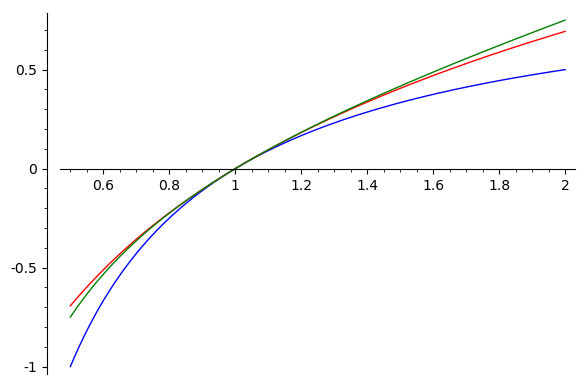

In [138]:
plot((1 - x^(-1))/1,(x,0.5,2)) + plot(log(x),(x,0.5,2),color="red") + plot(Log(t)(x), (x,0.5,2),color="green")

## Approximate Exponential
$\newcommand\asinh{\textrm{asinh}}$
$$ \tilde E_t(x) := L_t^{-1}(x) = \exp(\asinh(tx)/t) $$

In [195]:
Exp_ = lambda t: exp(asinh(t * x) / t)

In [196]:
%display latex
var("x y")
float(((Exp_(1) - x)^2 - x^2)(1023))

1.0

In [197]:
Exp_(2)

sqrt(2*x + sqrt(4*x^2 + 1))

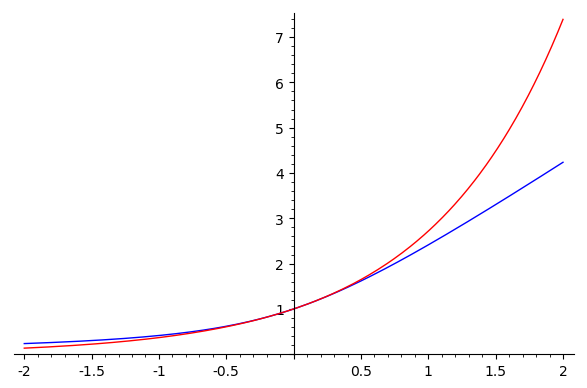

In [199]:
plot(Exp_(1), (x,-2,2)) + plot(exp(x),(x,-2,2),color="red")

## Puzzle Variation

If $$ (2x + \sqrt{4x^2+1})(2y + \sqrt{4y^2+1}) = 1, $$
what is the value of $(x+y)^2$?

## Alternative Presentation of $E_t$

It seems we can write

$$ E_t(x) = \left( tx + \sqrt{t^2x^2 + 1} \right)^{1/t} $$

**TODO: Proof?**

In [198]:
Exp = lambda t: (t*x + sqrt((t*x)^2 + 1))^(1/t)

Plugging in $t = 1/n$ and assuming $n >> |x|$ we get

$$ \left( \sqrt{1 + \frac{x^2}{n^2}} + \frac{x}{n} \right)^n 
\approx \left( 1  + \frac{x}{n} \right)^n $$

### Identities

$$ E_t(0) = 1 $$

$$ E_t(a + b) = ... $$

$$ E_t(ab) = ... $$

## Comparison with popular approximation

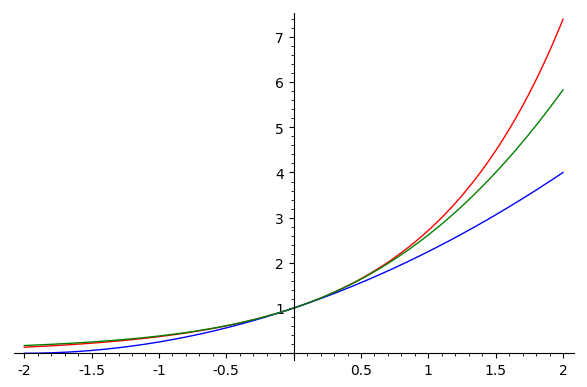

In [208]:
n = 2
Range = (x,-2,2)
plot(exp(x),Range,color="red")\
    + plot((1+x/n)^n,Range,color="blue")\
    + plot(Exp(1/n),Range,color="green")

In [216]:
map(Exp(1),[3,x,3+x])

[sqrt(10) + 3, x + sqrt(x^2 + 1), x + sqrt((x + 3)^2 + 1) + 3]

## Error Terms

In [260]:
[ (k, taylor(Log(k)(1+x),x,0,6).coefficient(x^3)) for k in range(1,10) ]

[(1, 1/2),
 (2, 1),
 (3, 11/6),
 (4, 3),
 (5, 9/2),
 (6, 19/3),
 (7, 17/2),
 (8, 11),
 (9, 83/6)]

In [277]:
([ (taylor(Log(k/10)(1+x),x,0,6).coefficient(x^3)) for k in range(1,10) ])

[67/200, 17/50, 209/600, 9/25, 3/8, 59/150, 83/200, 11/25, 281/600]

The error is always $\mathcal{O}(x^3)$, but the constant scales with $t$.

In [282]:
600*(17/50 - 67/200)

3

In [283]:
600*(209/600 - 17/50)

5

In [284]:
600*(9/25 - 209/600)

7

In [285]:
600*(3/8 - 9/25)

9

    600 * (f(k+1/10)-f(k)) == 2*k - 1

In [345]:
Poly = x^2/60 - 11/600*x + 101/300
expand(600*(Poly(x=(x+1/10)) - Poly))

2*x - 1

In [349]:
Poly(3/10)

499/1500